In [1]:
pip install lazypredict

**Importing Libraries**

In [2]:
import pandas as pd
# Visualization / EDA
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV
# Machine Learning : Identifying algorithms/Model
from lazypredict.Supervised import LazyRegressor
# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score


**Loading Datasets**

In [3]:
stores_df = pd.read_csv("/content/stores_data_set.csv")
sales_df = pd.read_csv("/content/sales_data_set.csv")
features_df = pd.read_csv("/content/Features_data_set.csv")

**Merging Datasets**

In [4]:
merged_df = pd.merge(stores_df, sales_df, on='Store', how='outer')
merged_df.head()


,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False


In [5]:
df = pd.merge(merged_df, features_df, on=['Store','Date'], how='outer')


**EDA**

In [6]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.00,1.00,05/02/2010,24924.50,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
1,1,A,151315.00,2.00,05/02/2010,50605.27,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
2,1,A,151315.00,3.00,05/02/2010,13740.12,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
3,1,A,151315.00,4.00,05/02/2010,39954.04,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
4,1,A,151315.00,5.00,05/02/2010,32229.38,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [7]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [7]:

continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type",   "IsHoliday_x", "IsHoliday_y", "Dept"]

string_columns = df.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,423325.00,22.20,12.79,1.00,11.00,22.00,33.00,45.00
Size,421570.00,136727.92,60980.58,34875.00,93638.00,140167.00,202505.00,219622.00
Dept,421570.00,44.26,30.49,1.00,18.00,37.00,74.00,99.00
Weekly_Sales,421570.00,15981.26,22711.18,-4988.94,2079.65,7612.03,20205.85,693099.36
Temperature,423325.00,60.07,18.45,-7.29,46.67,62.07,74.26,101.95
Fuel_Price,423325.00,3.36,0.46,2.47,2.94,3.45,3.74,4.47
MarkDown1,152433.00,7246.60,8319.91,-2781.45,2230.80,5336.52,9210.90,103184.98
MarkDown2,112532.00,3337.60,9461.27,-265.76,42.00,194.67,1943.20,104519.54
MarkDown3,138658.00,1449.10,9674.71,-179.26,5.14,24.83,104.50,149483.31
MarkDown4,136466.00,3382.02,6306.73,0.22,500.91,1465.54,3592.00,67474.85


In [14]:
df[string_columns].describe().T

,count,unique,top,freq
Type,421570,3,A,215478
Date,423325,182,23/12/2011,3027
IsHoliday_x,421570,2,False,391909
IsHoliday_y,423325,2,False,393529


In [15]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

**Correlation**

In [10]:
string_columns

Index(['Type', 'Date', 'IsHoliday_x', 'IsHoliday_y'], dtype='object')

In [8]:
corr_df = df.copy()

In [11]:
encode=LabelEncoder()

for column in string_columns:
  encode.fit(corr_df[[column]])
  corr_df[column] = encode.transform(corr_df[[column]])


In [19]:
corr_df.head(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,0,151315.00,1.00,24,24924.50,0,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,0
1,1,0,151315.00,2.00,24,50605.27,0,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,0


In [20]:
corr_df.corr()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Store,1.00,0.22,-0.18,0.02,0.00,-0.09,0.00,-0.05,0.07,-0.12,-0.04,-0.03,-0.01,-0.03,-0.21,0.21,-0.00
Type,0.22,1.00,-0.81,0.00,-0.00,-0.18,0.10,0.04,0.04,-0.24,-0.06,-0.03,-0.10,-0.23,-0.06,0.14,-0.00
Size,-0.18,-0.81,1.00,-0.00,-0.00,0.24,0.00,-0.06,0.00,0.35,0.11,0.05,0.17,0.30,-0.00,-0.07,0.00
Dept,0.02,0.00,-0.00,1.00,-0.00,0.15,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,0.01,0.00
Date,0.00,-0.00,-0.00,-0.00,1.00,-0.01,0.04,0.04,0.03,-0.30,0.06,0.14,-0.32,-0.13,0.00,-0.00,0.05
Weekly_Sales,-0.09,-0.18,0.24,0.15,-0.01,1.00,0.01,-0.00,-0.00,0.09,0.02,0.06,0.05,0.09,-0.02,-0.03,0.01
IsHoliday_x,0.00,0.10,0.00,0.00,0.04,0.01,1.00,-0.15,-0.06,-0.03,0.28,0.35,-0.00,-0.05,0.00,-0.00,0.90
Temperature,-0.05,0.04,-0.06,0.00,0.04,-0.00,-0.15,1.00,0.14,-0.04,-0.32,-0.10,-0.06,-0.02,0.18,0.10,-0.16
Fuel_Price,0.07,0.04,0.00,0.00,0.03,-0.00,-0.06,0.14,1.00,0.06,-0.22,-0.10,-0.04,-0.12,-0.16,-0.03,-0.08
MarkDown1,-0.12,-0.24,0.35,-0.00,-0.30,0.09,-0.03,-0.04,0.06,1.00,0.02,-0.11,0.82,0.15,-0.06,0.05,-0.03


In [ ]:
correlation_matrix = corr_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

**Data** **visualization**

In [12]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

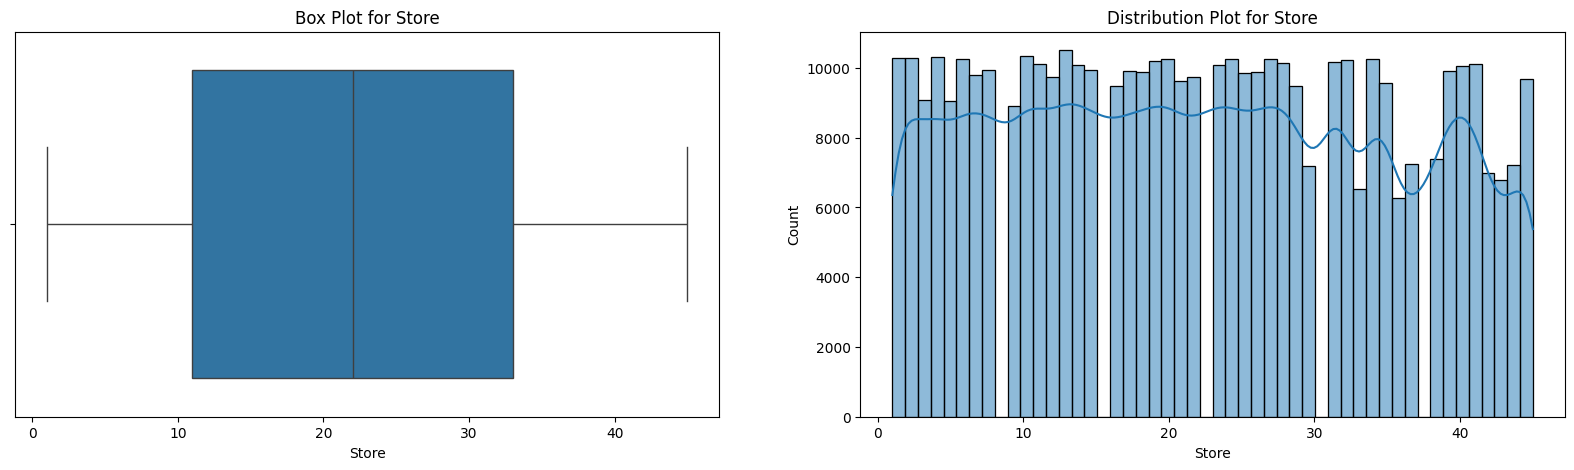

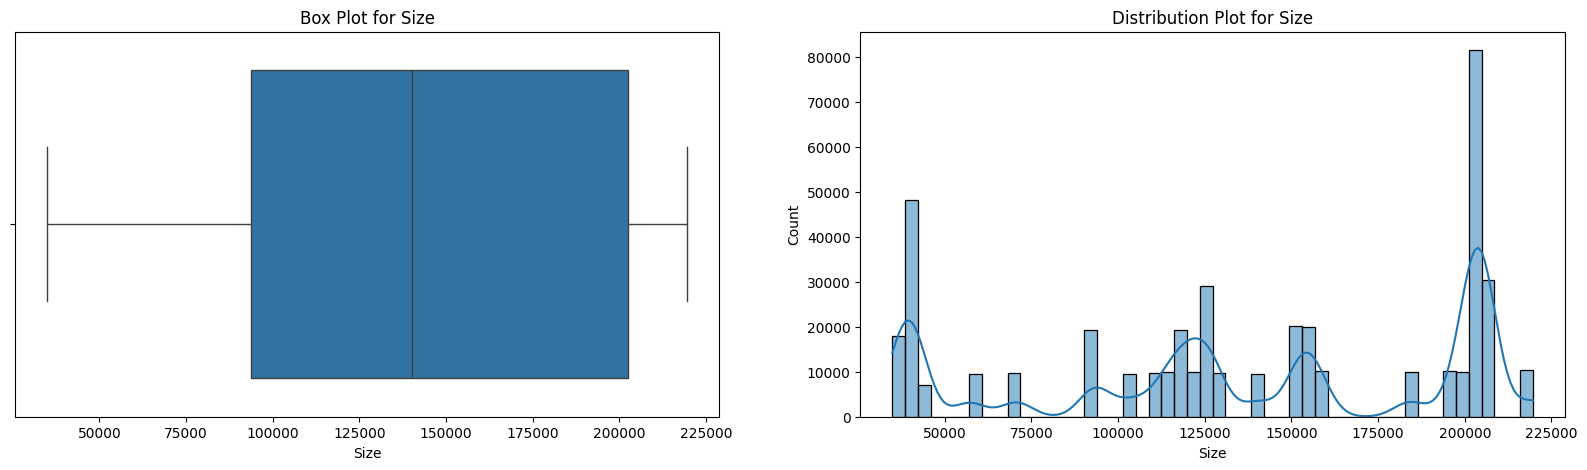

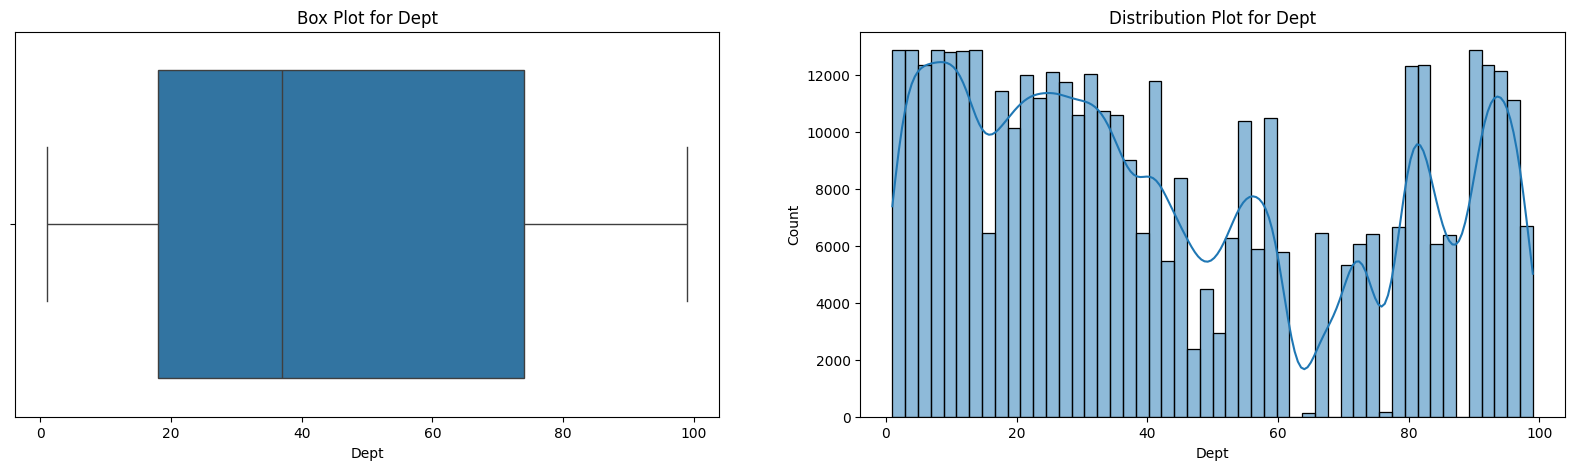

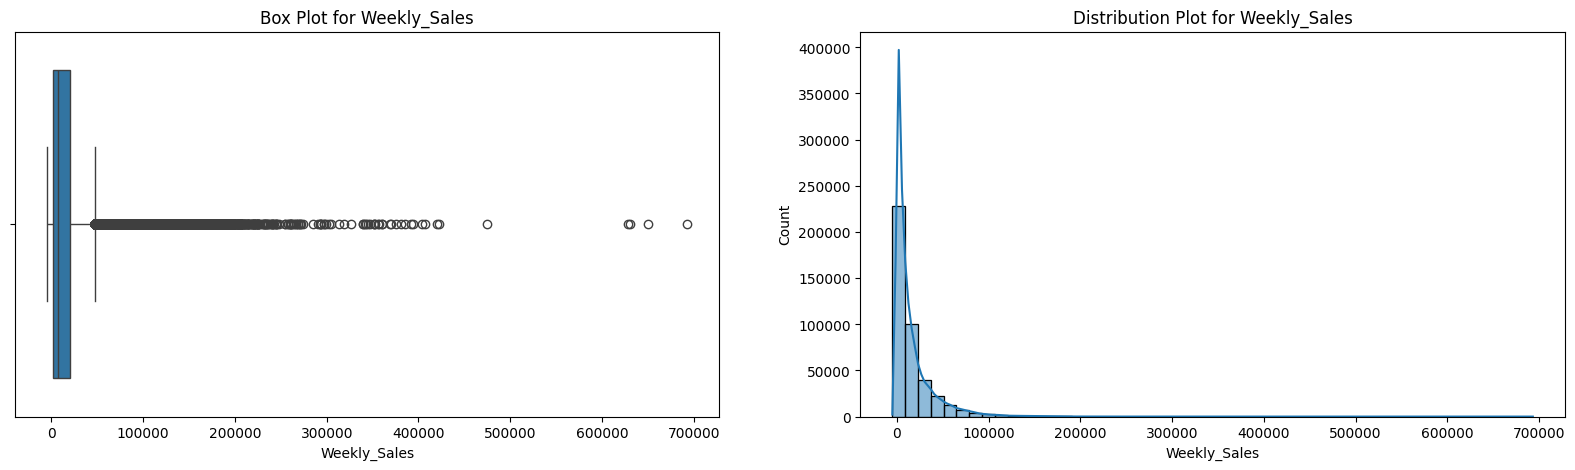

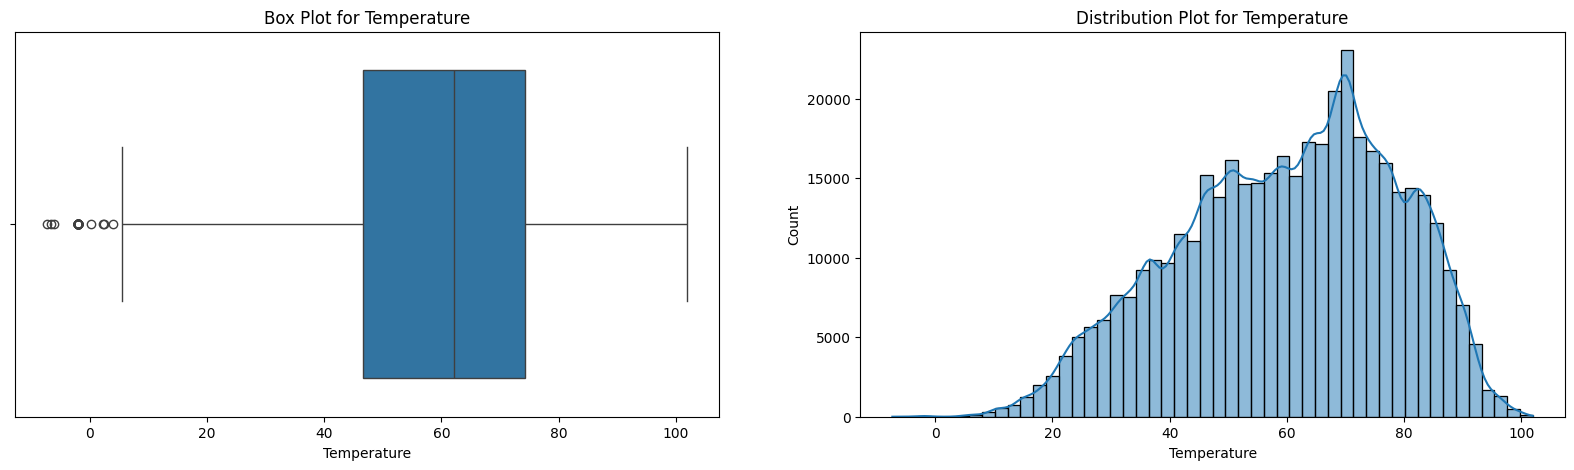

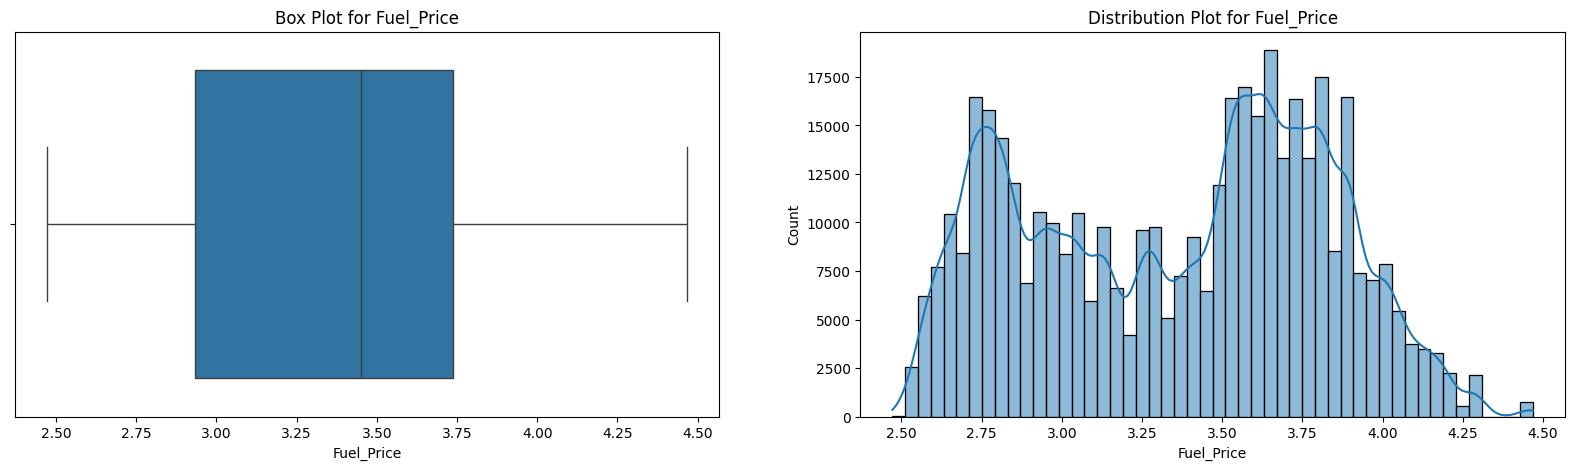

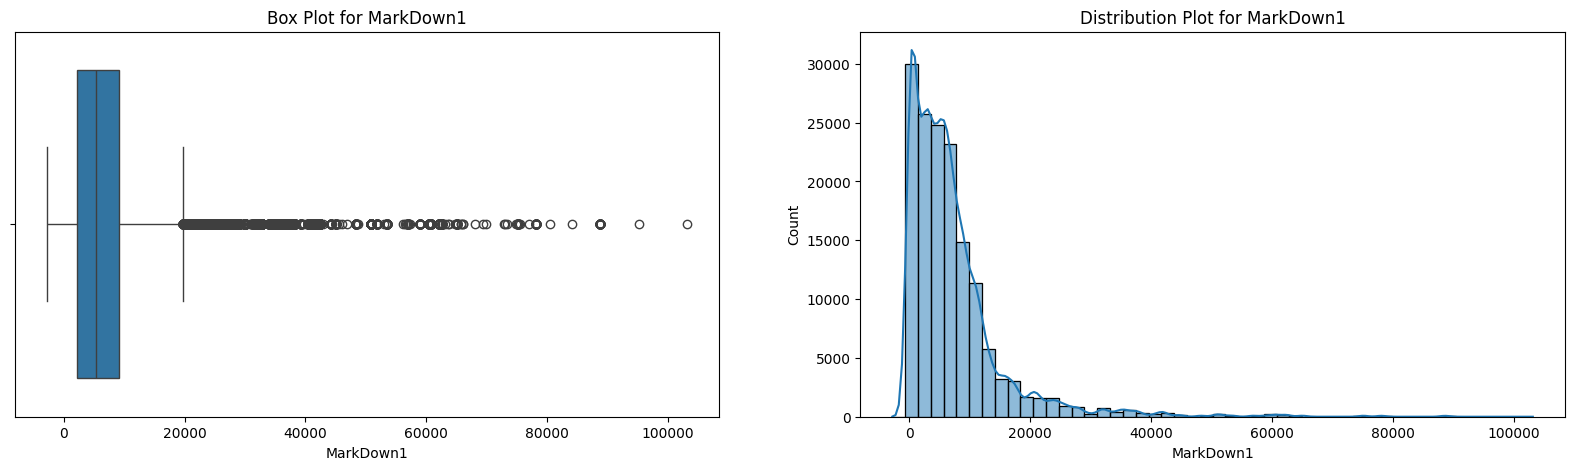

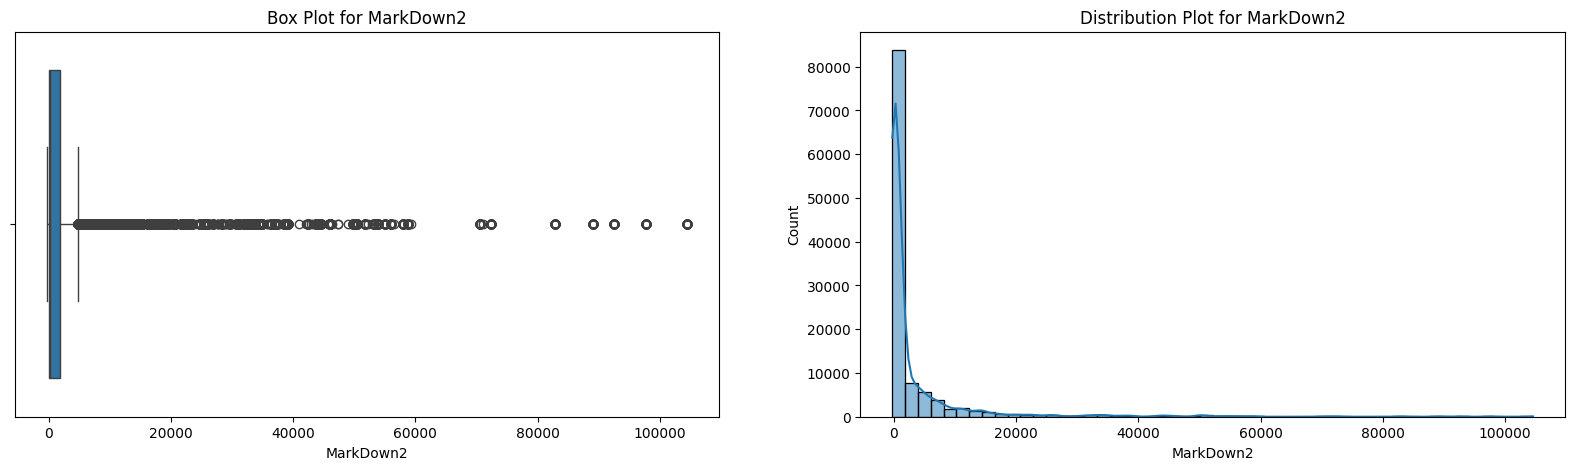

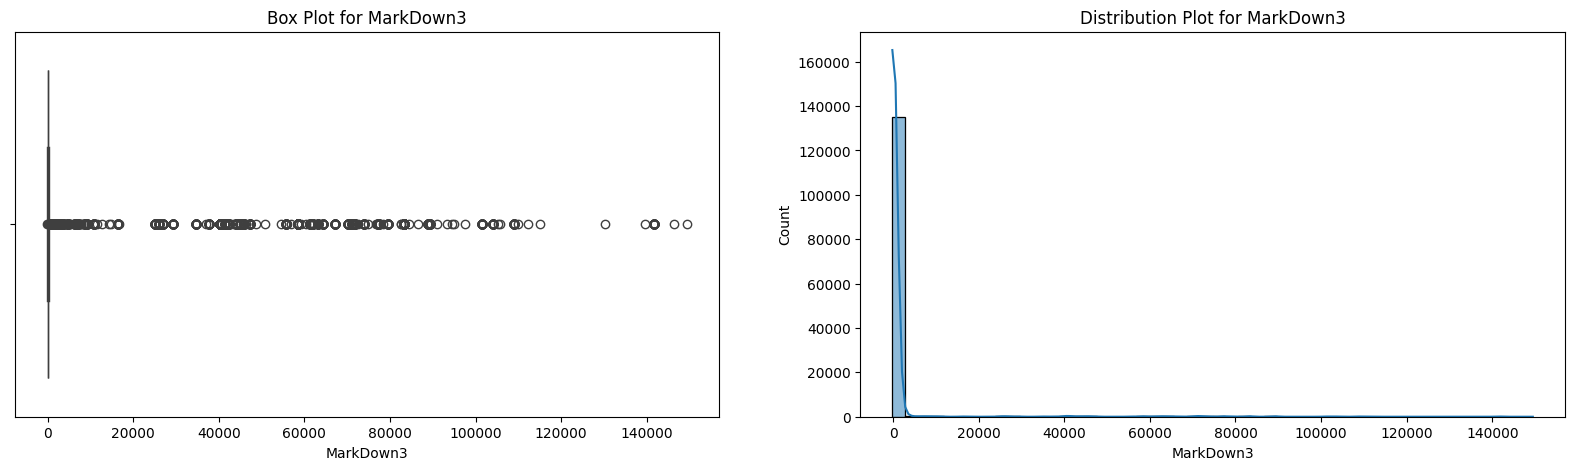

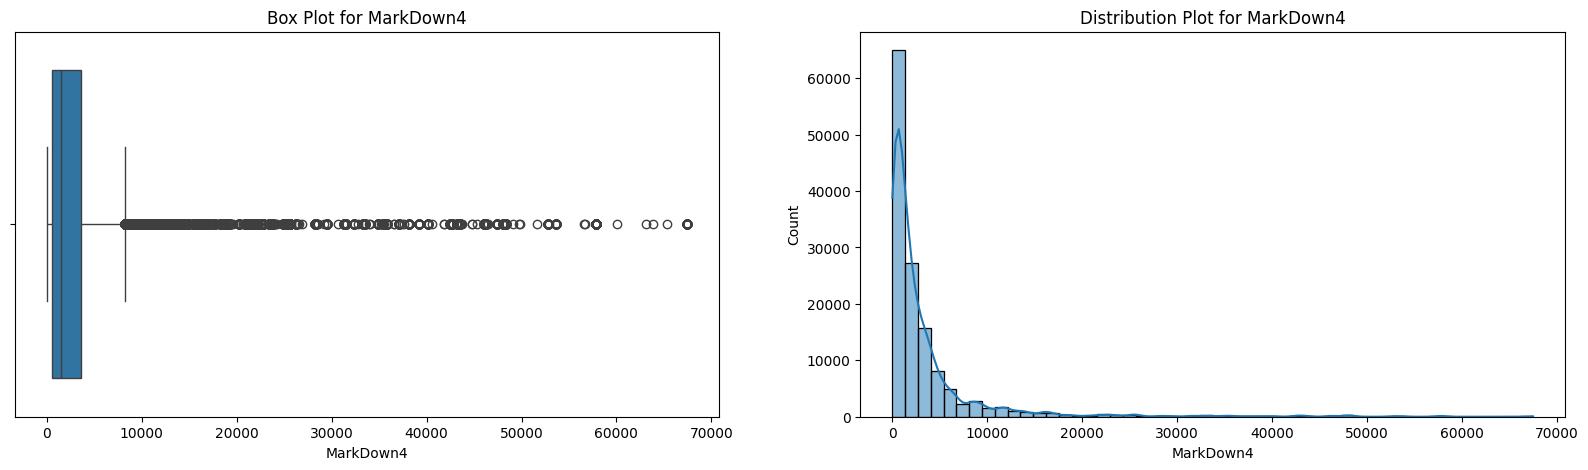

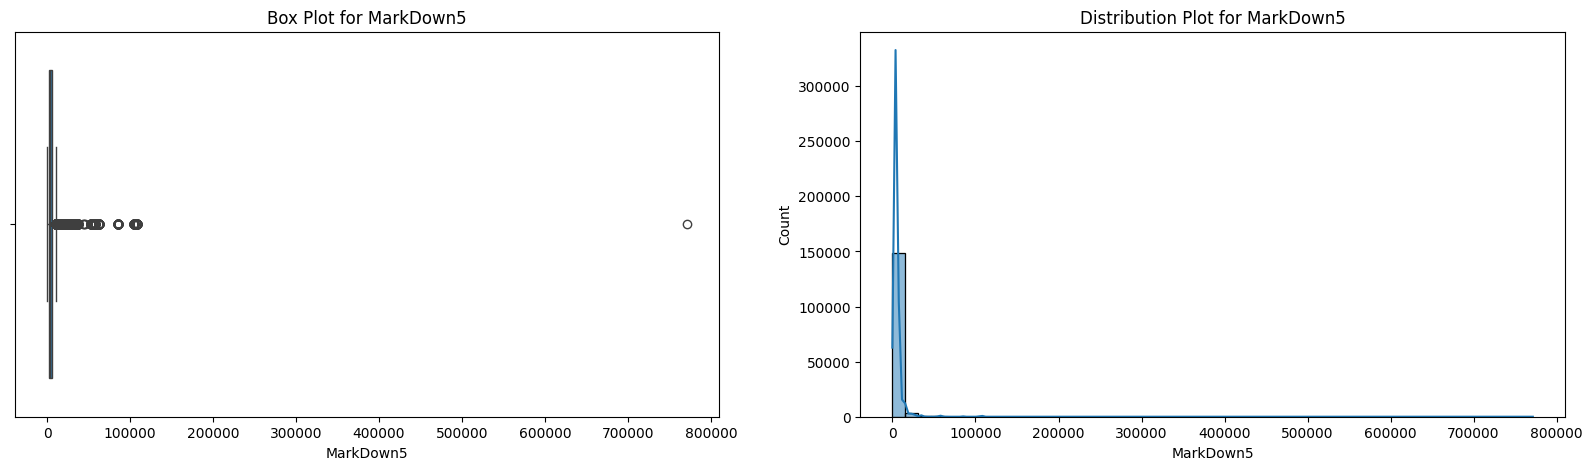

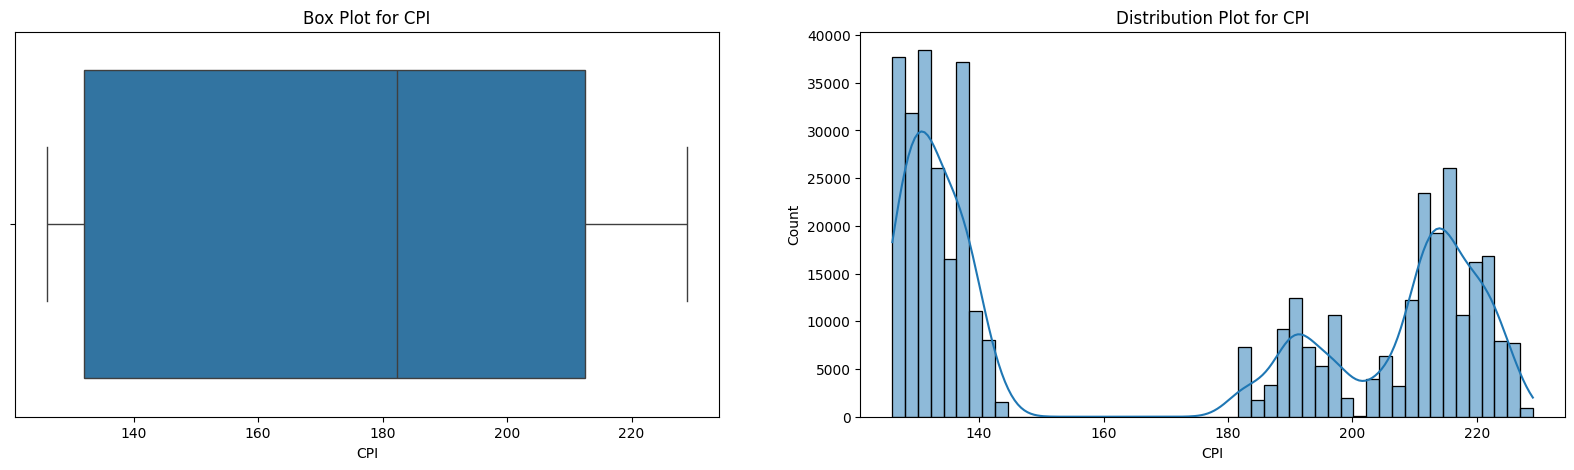

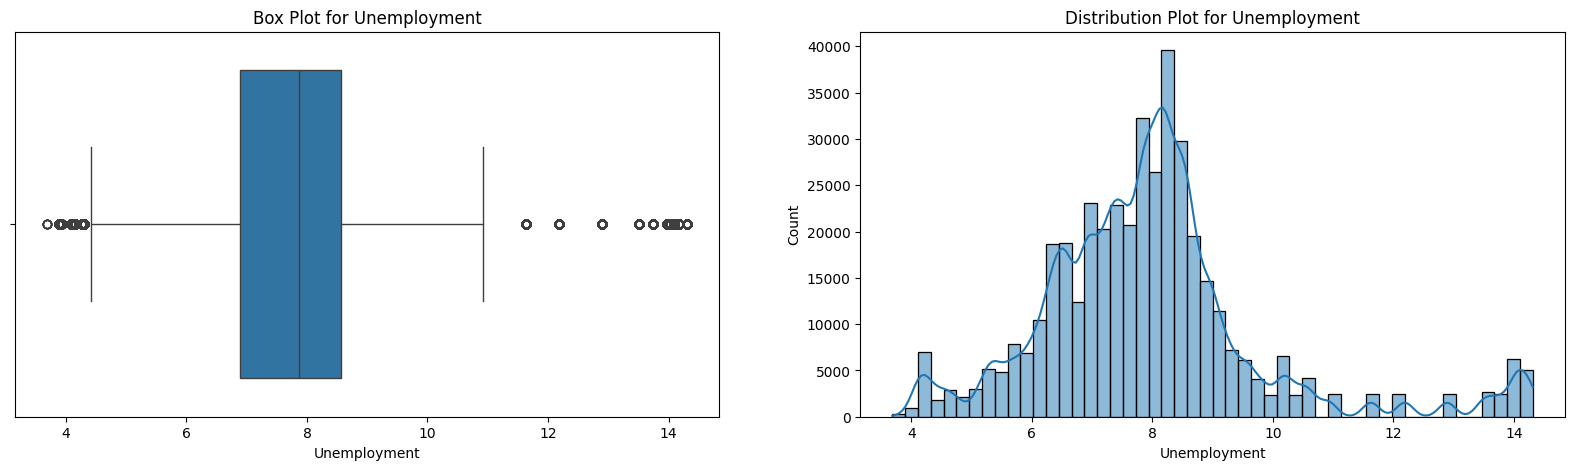

In [ ]:
for i in numeric_columns:
    plot(df, i)

**Data** **Preprocessing**

In [ ]:
df.head(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.00,1.00,05/02/2010,24924.50,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
1,1,A,151315.00,2.00,05/02/2010,50605.27,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False


In [ ]:
#Cleaning
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [13]:
df[df[['Type', 'Size', 'Dept','Weekly_Sales', 'IsHoliday_x']].isnull().any(axis=1)]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421570,1,NaN,NaN,NaN,02/11/2012,NaN,NaN,55.32,3.39,6766.44,5147.70,50.82,3639.90,2737.42,223.46,6.57,False
421571,1,NaN,NaN,NaN,09/11/2012,NaN,NaN,61.24,3.31,11421.32,3370.89,40.28,4646.79,6154.16,223.48,6.57,False
421572,1,NaN,NaN,NaN,16/11/2012,NaN,NaN,52.92,3.25,9696.28,292.10,103.78,1133.15,6612.69,223.51,6.57,False
421573,1,NaN,NaN,NaN,23/11/2012,NaN,NaN,56.23,3.21,883.59,4.17,74910.32,209.91,303.32,223.56,6.57,True
421574,1,NaN,NaN,NaN,30/11/2012,NaN,NaN,52.34,3.21,2460.03,NaN,3838.35,150.57,6966.34,223.61,6.57,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,NaN,NaN,NaN,28/06/2013,NaN,NaN,76.05,3.64,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,NaN,77.50,3.61,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,NaN,79.37,3.61,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,NaN,82.84,3.74,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [14]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday_x'], inplace=True)

In [23]:
df.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [24]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [25]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    391909
True      29661
Name: count, dtype: int64

In [15]:
df= df.drop(columns=['IsHoliday_x'])

In [16]:
# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [17]:
print("Markdown1=", df.MarkDown1.isnull().sum()/df.shape[0])
print("Markdown2=", df.MarkDown2.isnull().sum()/df.shape[0])
print("Markdown3=", df.MarkDown3.isnull().sum()/df.shape[0])
print("Markdown4=", df.MarkDown4.isnull().sum()/df.shape[0])
print("Markdown5=", df.MarkDown5.isnull().sum()/df.shape[0])

Markdown1= 0.6425718148824632
Markdown2= 0.7361102545247528
Markdown3= 0.6748084541120098
Markdown4= 0.6798467632896079
Markdown5= 0.6407903788220224


In [18]:
df.MarkDown1.fillna(0, inplace = True)
df.MarkDown2.fillna(0, inplace = True)
df.MarkDown3.fillna(0, inplace = True)
df.MarkDown4.fillna(0, inplace = True)
df.MarkDown5.fillna(0, inplace = True)

In [19]:
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")

In [20]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayOfWeek'] = df['Date'].dt.day

In [21]:
df = df.drop(columns=['Date'])

In [22]:
df.shape

(421570, 18)

In [23]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [24]:
col=['Unemployment','Temperature','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in col:
  outlier(df, i)


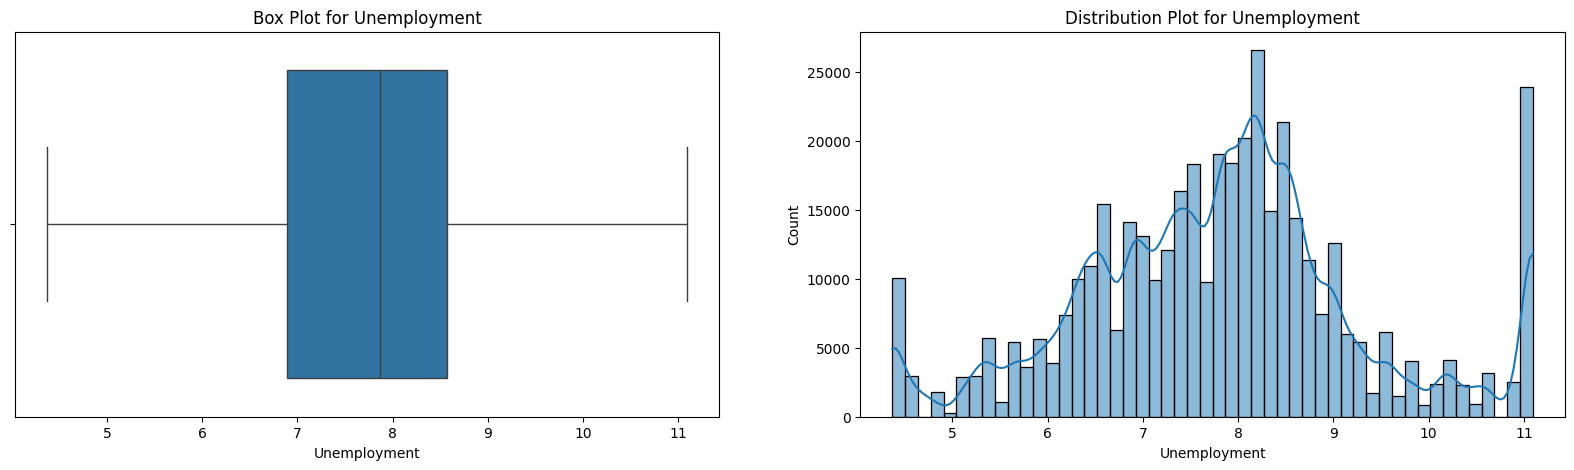

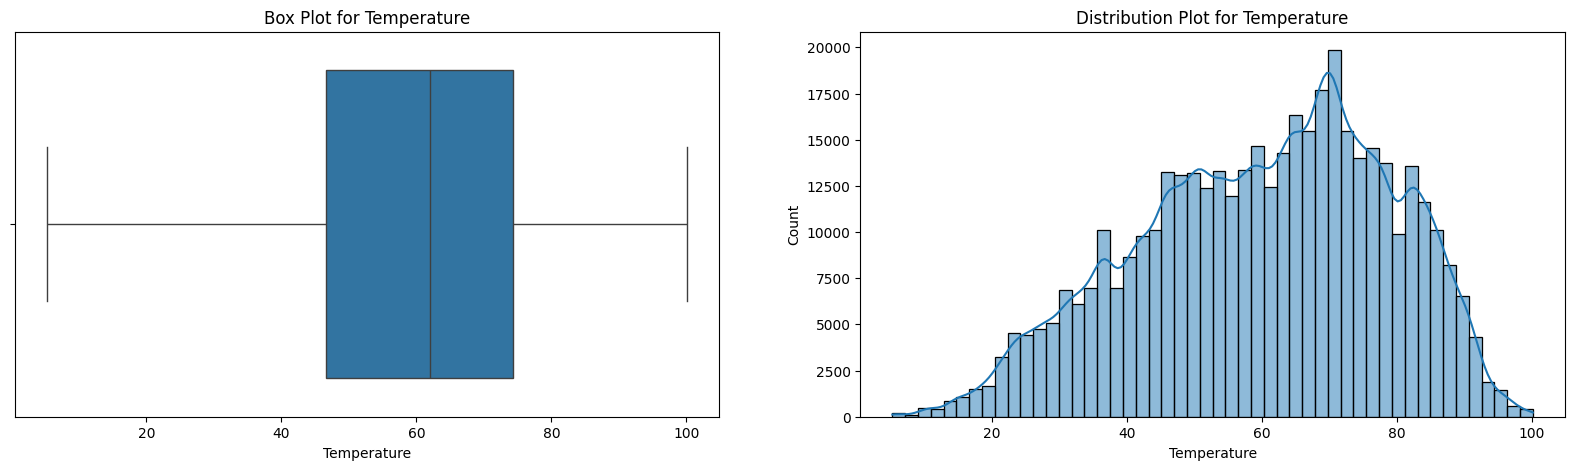

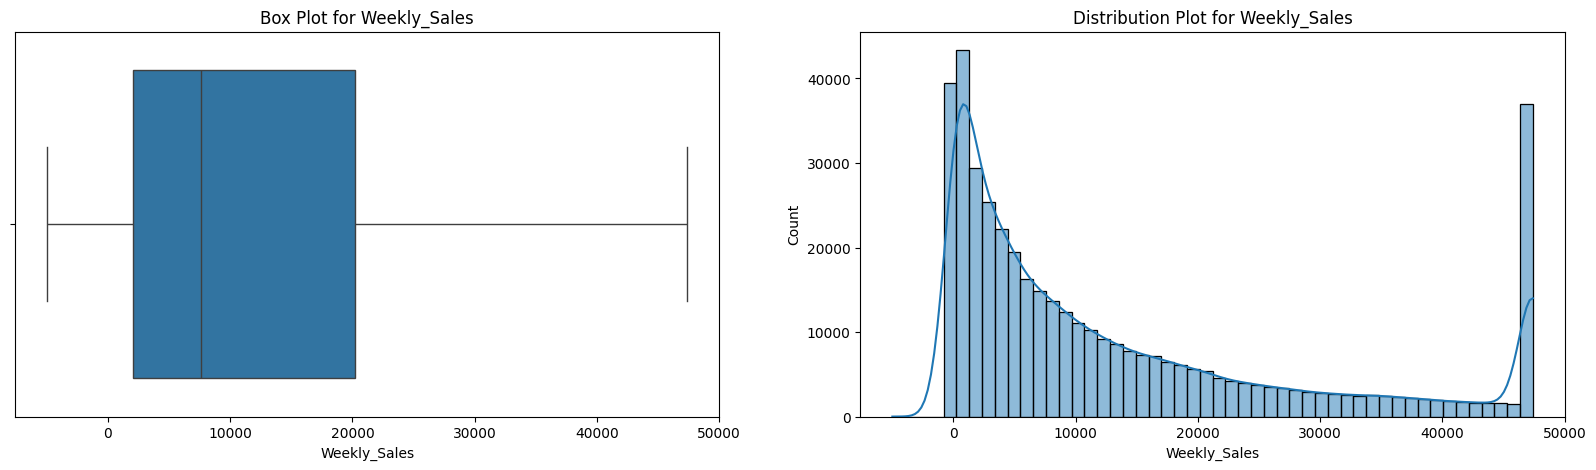

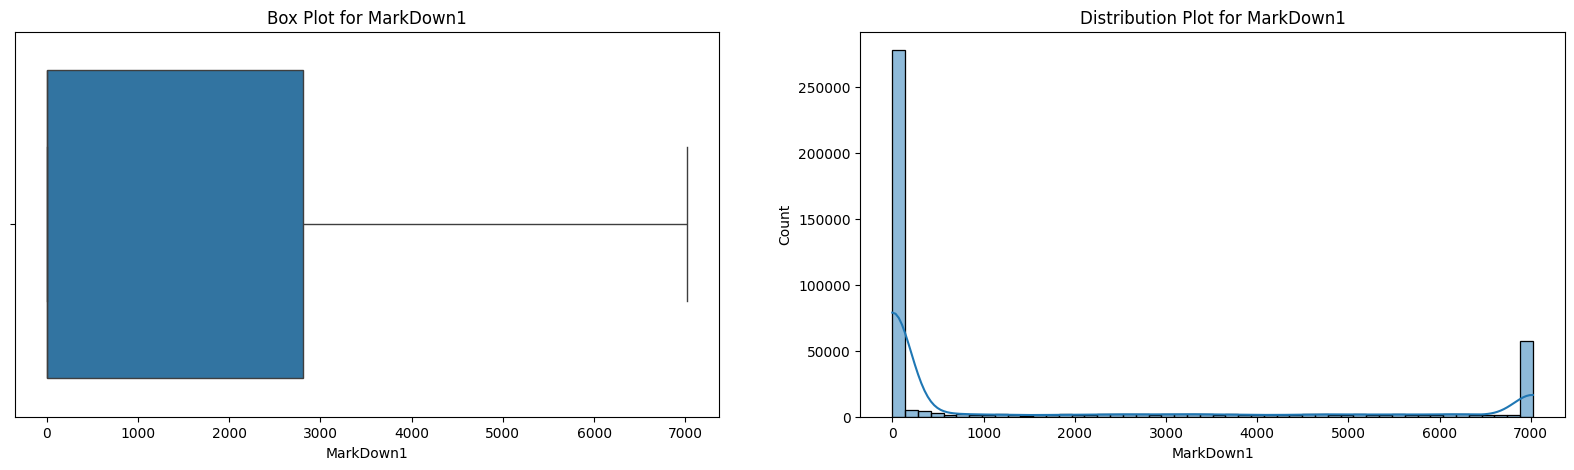

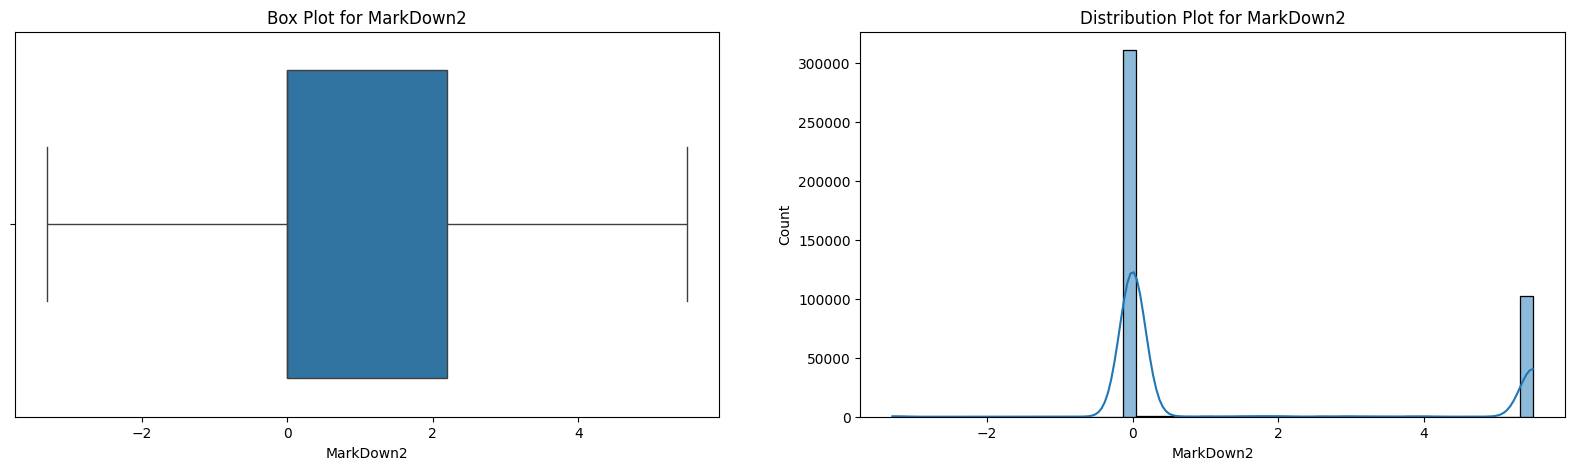

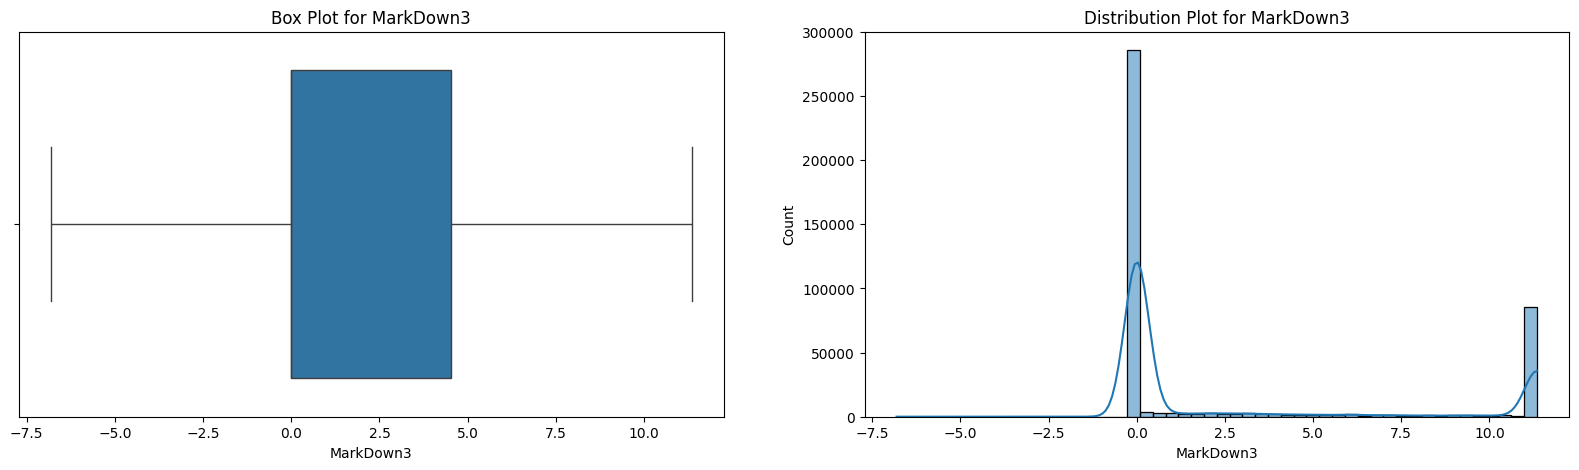

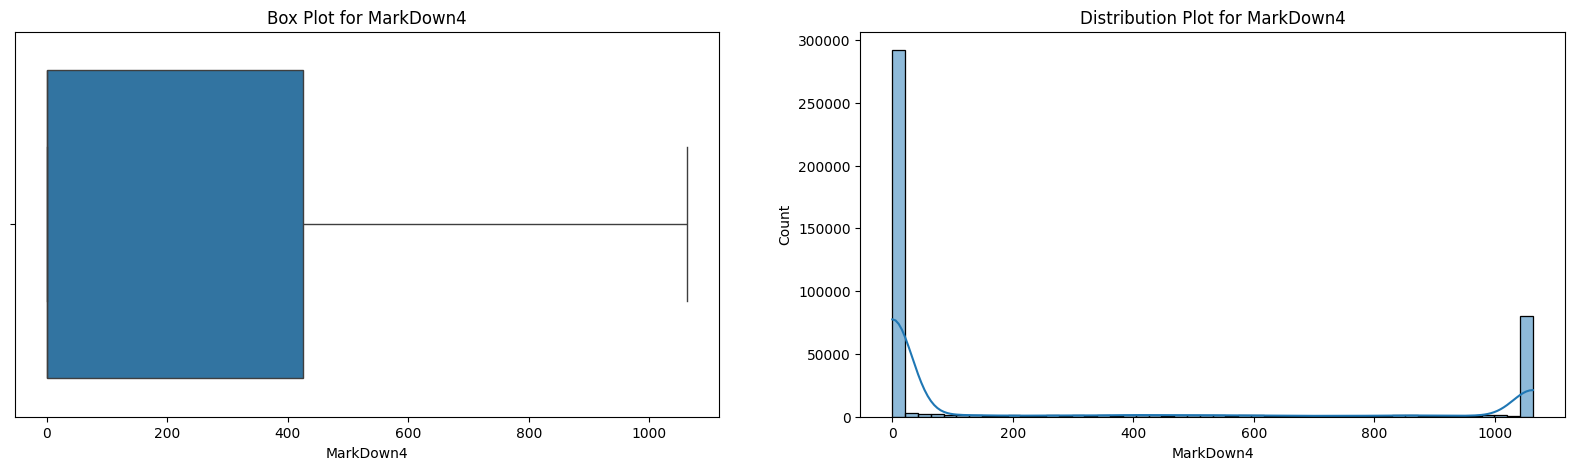

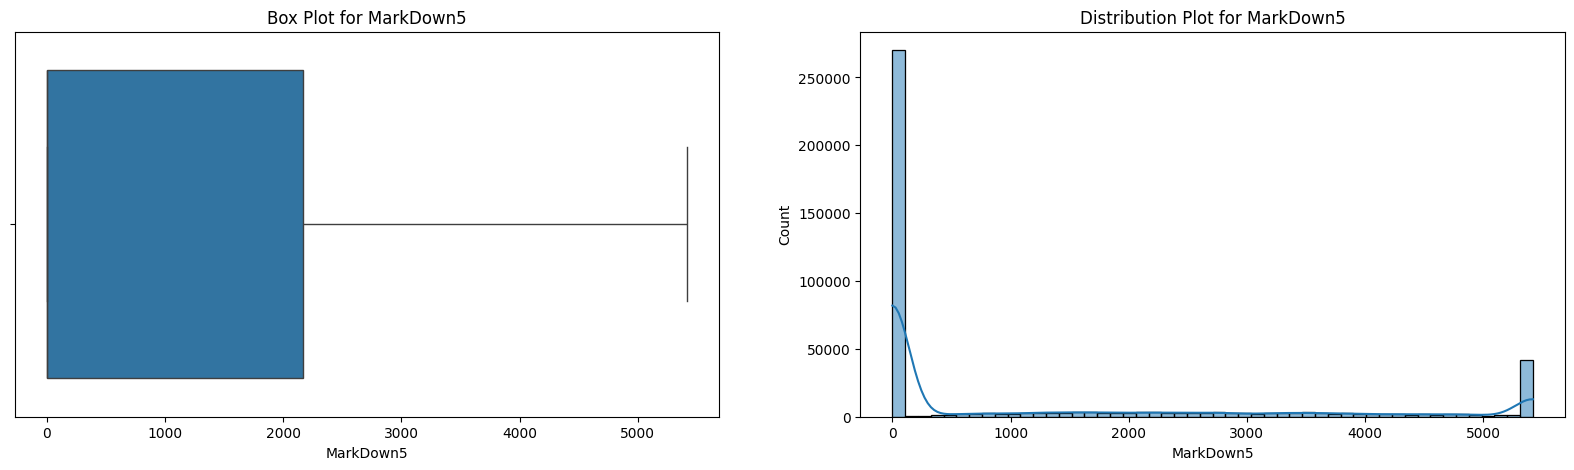

In [ ]:
for i in col:
  plot(df,i)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Weekly_Sales  421570 non-null  float64
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday     421570 non-null  bool   
 15  month         421570 non-null  int32  
 16  year          421570 non-null  int32  
 17  dayOfWeek     421570 non-null  int32  
dtypes: bool(1

**Encoding**

In [60]:
columns=["Type", "IsHoliday"]
encode=LabelEncoder()

for column in columns:
  encode.fit(df[[column]])
  df[column] = encode.transform(df[[column]])

**Insights**

**which Top 10 stores has highest weekly sales?**

In [61]:
mean_sales = df.groupby(['Store']).agg({'Weekly_Sales':'sum'}).reset_index()
z = mean_sales.nlargest(10,'Weekly_Sales').values.tolist()
data = {}
for i in z:
  data.update({i[0]:i[1]})
sorted_data = dict(sorted(data.items(),key=lambda item : item[1],reverse=True))
sorted_data

{4.0: 219554257.56,
 20.0: 218124259.81,
 13.0: 211493842.19125,
 10.0: 209727922.6275,
 2.0: 205763121.18875,
 14.0: 204834617.42125,
 27.0: 200254836.18125,
 6.0: 193901057.485,
 23.0: 180120568.04875,
 1.0: 177856439.15625}

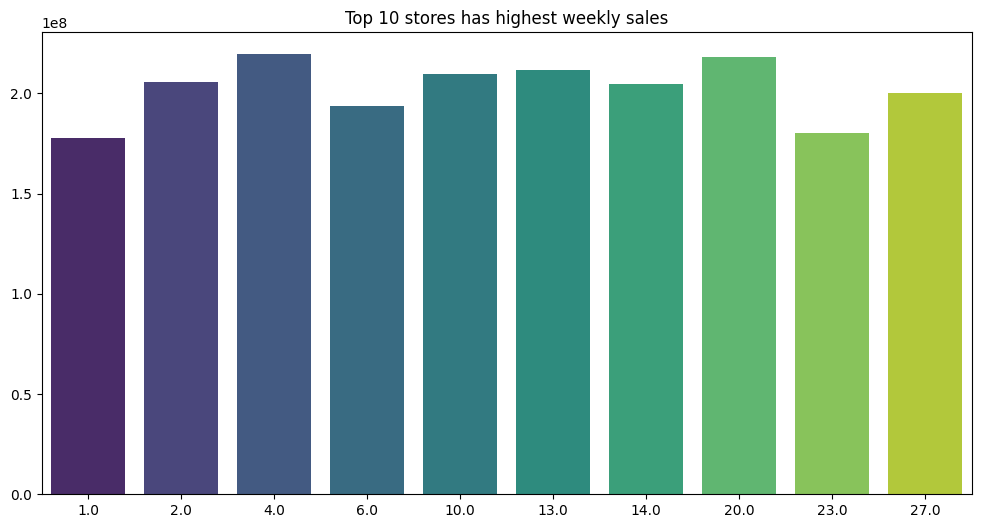

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=[i for i in sorted_data.keys()],y=[i for i in sorted_data.values()],palette='viridis').set(title='Top 10 stores has highest weekly sales')
plt.show()

**Which Top 10 stores has lowest weekly sales?**

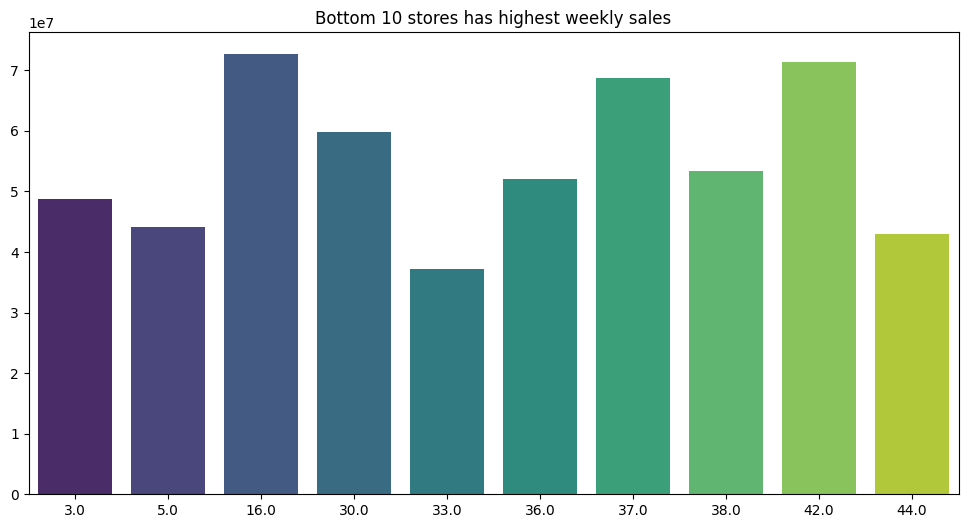

In [63]:
mean_sales = df.groupby(['Store']).agg({'Weekly_Sales':'sum'}).reset_index()
z = mean_sales.nsmallest(10,'Weekly_Sales').values.tolist()
data = {}
for i in z:
  data.update({i[0]:i[1]})
sorted_data = dict(sorted(data.items(),key=lambda item : item[1],reverse=True))
sorted_data
plt.figure(figsize=(12, 6))
sns.barplot(x=[i for i in sorted_data.keys()],y=[i for i in sorted_data.values()],palette='viridis').set(title='Bottom 10 stores has highest weekly sales')
plt.show()

**What are the Departments Perform Better In Specific Store Types?**

In [71]:
mention_store_type = int(input('Enter Store Type:'))
performance_in_store_types = df.query(f'Type=={mention_store_type}').groupby(['Dept','Store'])['Weekly_Sales'].sum().reset_index()
performance_in_store_types.nlargest(10,'Weekly_Sales')

Enter Store Type:2


,Dept,Store,Weekly_Sales
319,90.00,43,6777507.34
328,92.00,37,6777507.34
330,92.00,42,6777507.34
331,92.00,43,6777507.34
349,95.00,43,6777507.34
182,38.00,30,6777479.52
348,95.00,42,6770124.38
183,38.00,37,6766681.73
346,95.00,37,6758270.54
327,92.00,30,6754215.45


**What are the Departments Not Performing Better In Specific Store Types?**

In [66]:
mention_store_type = input('Enter Store Type:')
performance_in_store_types = df.query(f'Type=={mention_store_type}').groupby(['Dept','Store'])['Weekly_Sales'].sum().reset_index()
performance_in_store_types.nsmallest(10,'Weekly_Sales')

Enter Store Type:2


,Dept,Store,Weekly_Sales
264,72.00,42,-1209.93
258,71.00,42,-467.56
260,71.00,44,-123.85
230,55.00,42,-43.96
196,41.00,42,-16.00
231,55.00,43,-11.88
180,34.00,44,-9.88
369,99.00,30,-7.06
102,19.00,30,2.38
131,24.00,43,4.47


**Do sales tend to be higher on Holidays?**

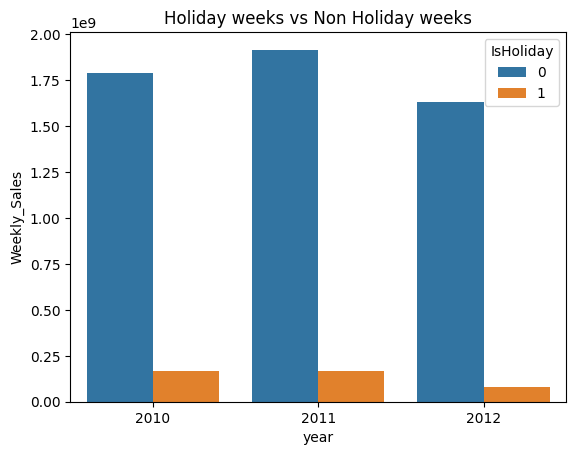

In [74]:
data = df.groupby(['IsHoliday','year'])['Weekly_Sales'].sum().reset_index()
sns.barplot(data=data,x='year',y='Weekly_Sales',hue='IsHoliday')
plt.title('Holiday weeks vs Non Holiday weeks')
plt.show()

**Department-wise sales for each store for the following year**

2010
1


<Axes: xlabel='Dept'>

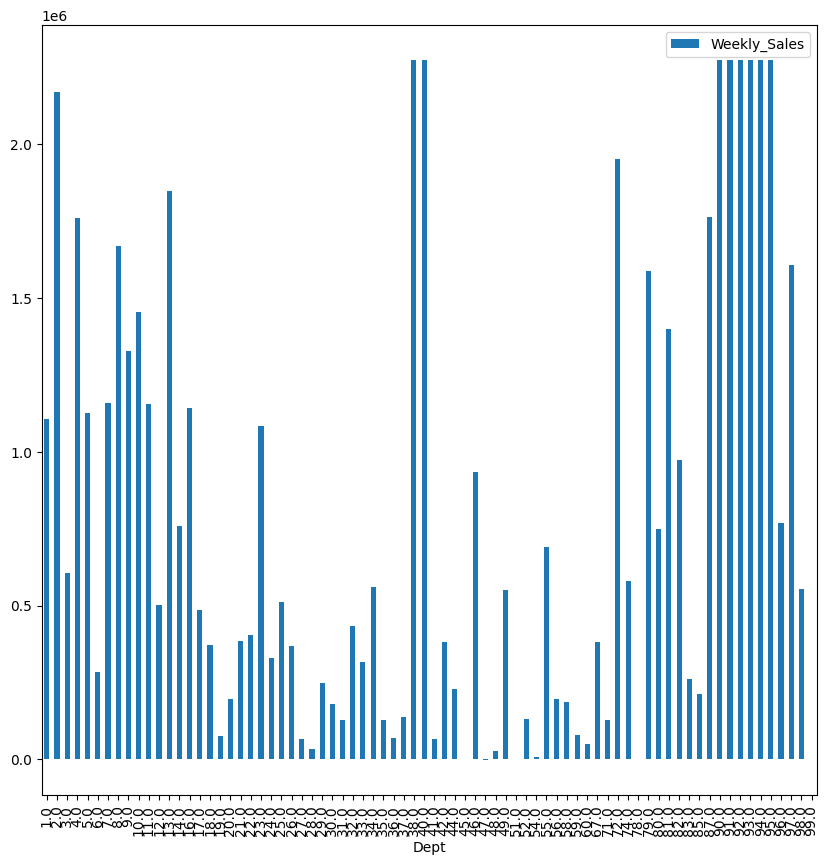

In [75]:

df_a=df.groupby(['Store', 'Dept', 'year'])['Weekly_Sales'].sum()
df_a=df_a.reset_index()
df_year=df_a[df_a['year']==int(input())]
df_store=df_year[df_year['Store']==int(input())]
df_store.plot(kind='bar',x='Dept',y='Weekly_Sales',figsize=(10,10))

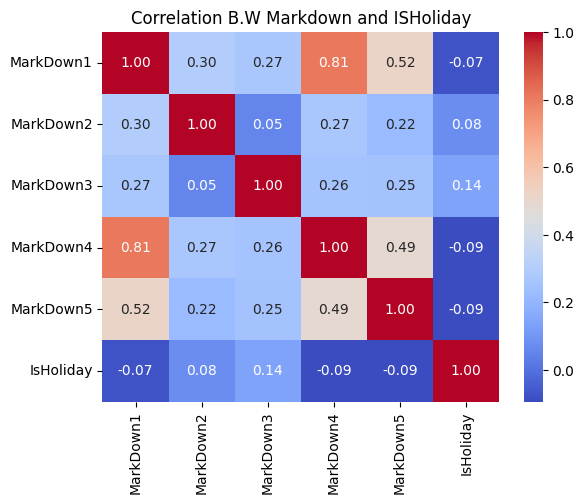

In [76]:
#Correlation Of Holiday B.W Markdown
df_b=df.groupby(['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4','MarkDown5','IsHoliday'])['Weekly_Sales'].sum()
df_b=df_b.reset_index()
sns.heatmap(df_b[['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5','IsHoliday'	]].corr(),annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation B.W Markdown and ISHoliday')
plt.show()


**Scaling**

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaler_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [ ]:
scaler_df.head(7)

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,month,year,dayOfWeek
0,-1.66,-0.89,0.24,-1.42,0.76,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22
1,-1.66,-0.89,0.24,-1.39,2.26,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22
2,-1.66,-0.89,0.24,-1.35,0.01,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22
3,-1.66,-0.89,0.24,-1.32,1.76,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22
4,-1.66,-0.89,0.24,-1.29,1.25,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22
5,-1.66,-0.89,0.24,-1.25,-0.53,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22
6,-1.66,-0.89,0.24,-1.22,0.50,-0.96,-1.72,-0.61,-0.57,-0.60,-0.60,-0.64,1.02,0.18,-0.28,-1.37,-1.22,-1.22


**Machine Learning**

In [ ]:
x=scaler_df.drop("Weekly_Sales",axis=1)
y=scaler_df["Weekly_Sales"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

**Identifying algorithms/Model**

In [ ]:
# Randomly sample
sampled_data = df.sample(frac=0.05, random_state=42)
X=sampled_data.drop("Weekly_Sales",axis=1)
Y=sampled_data["Weekly_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

 21%|██▏       | 9/42 [00:08<00:55,  1.68s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 71%|███████▏  | 30/42 [04:56<00:57,  4.83s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 95%|█████████▌| 40/42 [05:31<00:07,  3.98s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2301
[LightGBM] [Info] Number of data points in the train set: 15808, number of used features: 17
[LightGBM] [Info] Start training from score 13833.938433


100%|██████████| 42/42 [05:33<00:00,  7.95s/it]

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
RandomForestRegressor                        0.93       0.93    4074.39   
XGBRegressor                                 0.92       0.92    4269.07   
BaggingRegressor                             0.92       0.92    4326.71   
ExtraTreesRegressor                          0.91       0.91    4611.28   
LGBMRegressor                                0.89       0.89    4972.36   
HistGradientBoostingRegressor                0.89       0.89    5052.44   
DecisionTreeRegressor                        0.87       0.87    5536.35   
GradientBoostingRegressor                    0.73       0.74    7841.62   
ExtraTreeRegressor                           0.70       0.70    8324.60   
AdaBoostRegressor                            0.37       0.37   12115.62   
KNeighborsRegressor                          0.09       0.09   14558.52   
LarsCV                   

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = RF_model.predict(x_train)
y_pred_test = RF_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test


(0.9976649212035533, 0.9836466091574024)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

0.016392859464053163

In [ ]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor().fit(x_train,y_train)
y_pred_train = XGB_model.predict(x_train)
y_pred_test = XGB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.952753823723141, 0.9513557615586802)

**Evaluation**

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

0.048761640456077254